# Histogram Equalization

**Histogram equalization:** 
Stretches histogram to include all ranges if the original histogram is confined only to a small region - low contrast images. But, this type of stretching may not result in ideal results and gives  too bright and too dark regions in the image. This can be very bad for images with large intensity variations. 

**CLAHE:Contrast limited adaptive histogram equalization**
Regular histogram equalization uses global contrast of the image. This results in too bright and too dark regions as the histogram stretches and is not confined to specific region.

**Adaptive histogram equalization** divides the image into small tiles and within each tile the histogram is equalized. Tile size is typically 8x8. If theimage contains noise, it gets amplified during this process. Therefore, contrast limiting is applied to limit the contrast below a specific limit. Bilinear interpolation is performed between tile borders. 

Below, let us perform both histogram equalization and CLAHE and compare the results. 

The best way to work with color images is by converting them to luminance space,e.g. LAB, and enhancing lumincnace channel only and eventually combining all channels. 

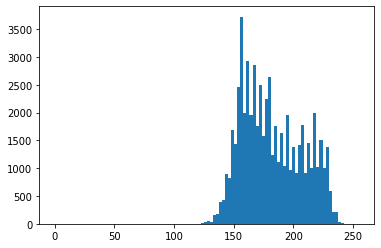

In [4]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

img = cv2.imread("images/bio_low_contrast.jpg", 1)
#img = cv2.imread('images/retina.jpg', 1)

#Converting image to LAB Color so CLAHE can be applied to the luminance channel
lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

plt.hist(l.flat, bins=100, range=(0,255))
plt.show()

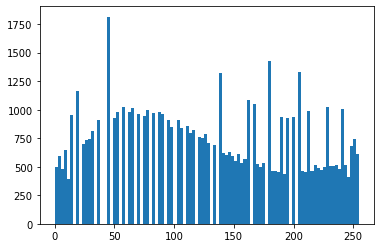

In [5]:
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)

plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()

#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

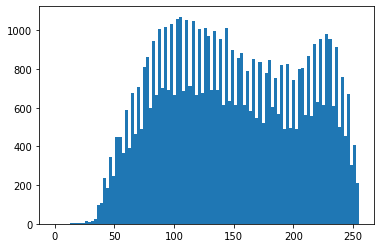

In [6]:
###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)

plt.hist(clahe_img.flat, bins=100, range=(0,255))
plt.show()

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)


# cv2.imshow("Original image", img)
# cv2.imshow("Equalized image", hist_eq_img)
# cv2.imshow('CLAHE Image', CLAHE_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 